# Testing if a Distribution is Normal

## Imports

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import quiz_tests

# Set plotting options
%matplotlib inline
plt.rc('figure', figsize=(16, 9))

## Create normal and non-normal distributions

In [8]:
# Sample A: Normal distribution
sample_a = stats.norm.rvs(loc=0.0, scale=1.0, size=(1000,))

# Sample B: Non-normal distribution
sample_b = stats.lognorm.rvs(s=0.5, loc=0.0, scale=1.0, size=(1000,))

## Boxplot-Whisker Plot and Histogram

We can visually check if a distribution looks normally distributed.  Recall that a box whisker plot lets us check for symmetry around the mean.  A histogram lets us see the overall shape.  A QQ-plot lets us compare our data distribution with a normal distribution (or any other theoretical "ideal" distribution).

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  5.,  4.,  5.,  0.,  6.,
         6., 14., 14., 14., 23., 32., 22., 32., 36., 61., 61., 60., 60.,
        46., 53., 64., 53., 53., 47., 40., 43., 31., 27., 16., 23., 10.,
        10.,  9.,  8.,  0.,  4.,  1.,  0.,  1.,  0.,  2.,  1.]),
 array([-3.85645074, -3.71328288, -3.57011502, -3.42694715, -3.28377929,
        -3.14061142, -2.99744356, -2.8542757 , -2.71110783, -2.56793997,
        -2.42477211, -2.28160424, -2.13843638, -1.99526851, -1.85210065,
        -1.70893279, -1.56576492, -1.42259706, -1.27942919, -1.13626133,
        -0.99309347, -0.8499256 , -0.70675774, -0.56358988, -0.42042201,
        -0.27725415, -0.13408628,  0.00908158,  0.15224944,  0.29541731,
         0.43858517,  0.58175304,  0.7249209 ,  0.86808876,  1.01125663,
         1.15442449,  1.29759235,  1.44076022,  1.58392808,  1.72709595,
         1.87026381,  2.01343167,  2.15659954,  2.2997674 ,  2.44293527,
         2.58610313,  2.72927099,  2.87243886,  3.01560672,

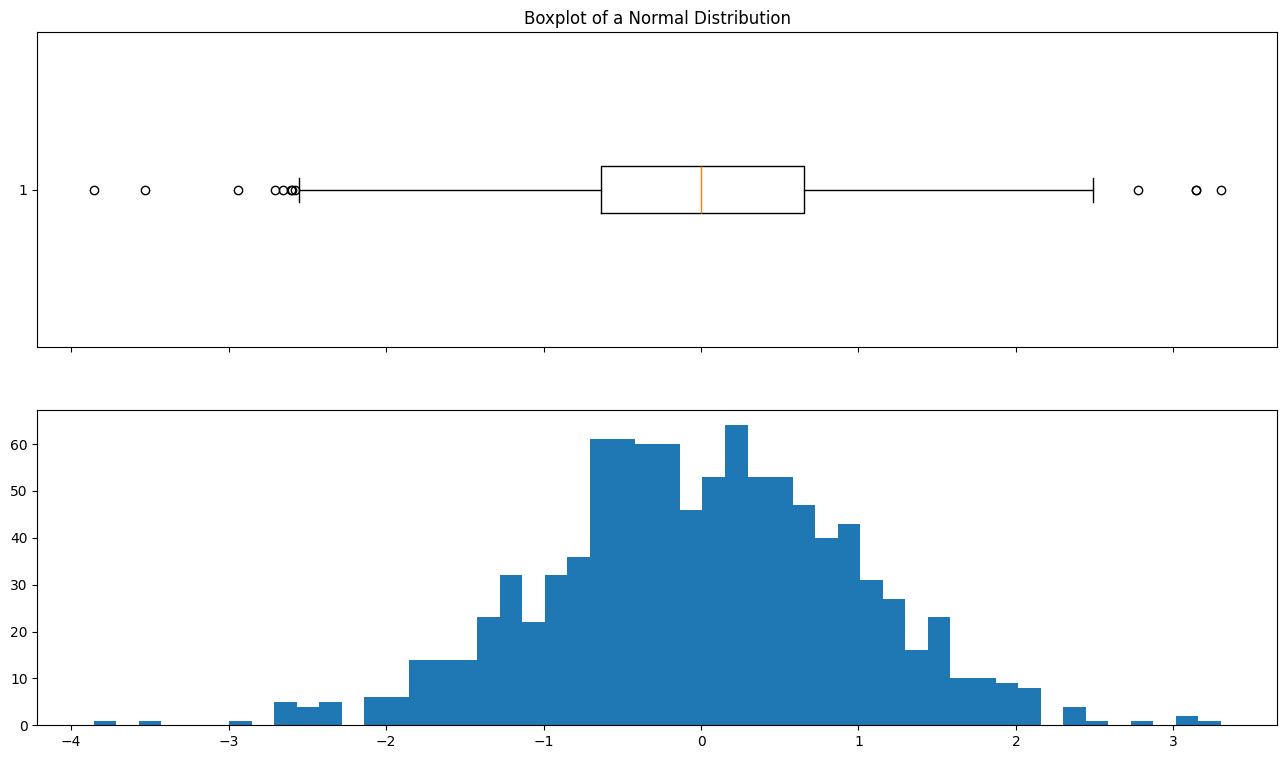

In [9]:
# Sample A: Normal distribution
# sample_a = stats.norm.rvs(loc=0.0, scale=1.0, size=(1000,))

fig, axes = plt.subplots(2, 1, figsize=(16, 9), sharex=True)

axes[0].boxplot(sample_a, vert=False)
axes[0].set_title("Boxplot of a Normal Distribution");

axes[1].hist(sample_a, bins=50)

(array([   8.,   28.,   57.,   77.,   91.,  100.,  101.,   98.,   78.,
          69.,   43.,   43.,   37.,   31.,   28.,   23.,   21.,   13.,
          11.,   13.,    7.,    2.,    3.,    2.,    1.,    2.,    5.,
           3.,    0.,    1.,    1.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([ 0.16687455,  0.2781771 ,  0.38947964,  0.50078219,  0.61208474,
         0.72338728,  0.83468983,  0.94599237,  1.05729492,  1.16859747,
         1.27990001,  1.39120256,  1.50250511,  1.61380765,  1.7251102 ,
         1.83641275,  1.94771529,  2.05901784,  2.17032038,  2.28162293,
         2.39292548,  2.50422802,  2.61553057,  2.72683312,  2.83813566,
         2.94943821,  3.06074076,  3.1720433 ,  3.28334585,  3.39464839,
         3.50595094,  3.61725349,  3.72855603,  3.83985858,  3.95116113,
         4.06246367,  4.17376622,  4.28506877,  4.39637131,  4.50767386,
         4.61897

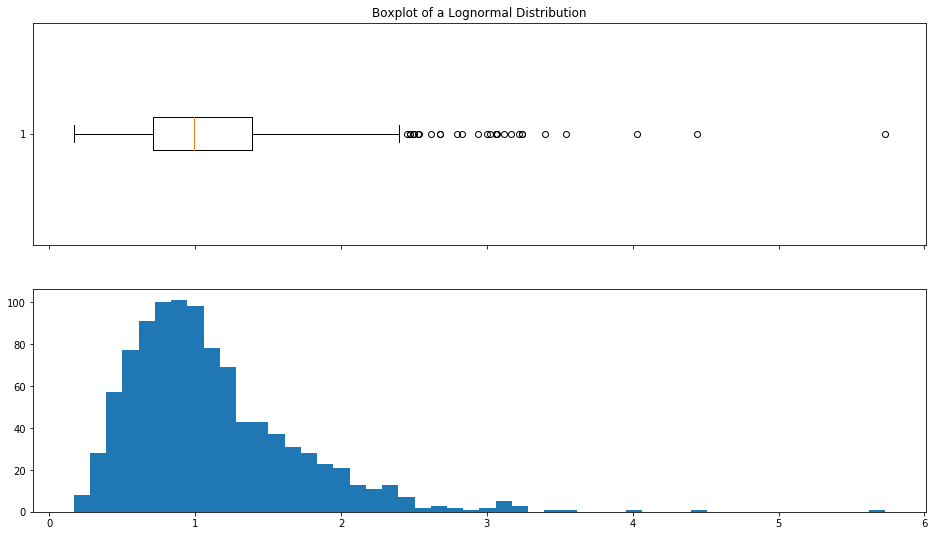

In [7]:
# Sample B: Non-normal distribution
#sample_b = stats.lognorm.rvs(s=0.5, loc=0.0, scale=1.0, size=(1000,))
fig, axes = plt.subplots(2, 1, figsize=(16, 9), sharex=True)

axes[0].boxplot(sample_b, vert=False)
axes[0].set_title("Boxplot of a Lognormal Distribution");

axes[1].hist(sample_b, bins=50)

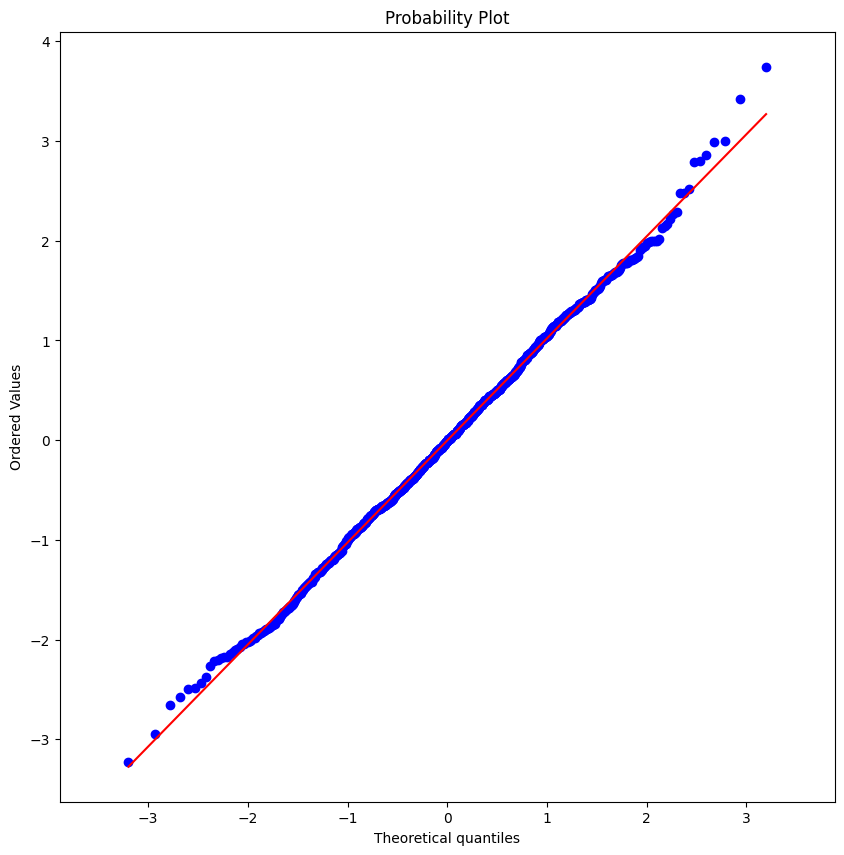

In [4]:
# Q-Q plot of normally-distributed sample
plt.figure(figsize=(10, 10)); plt.axis('equal')
stats.probplot(sample_a, dist='norm', plot=plt);

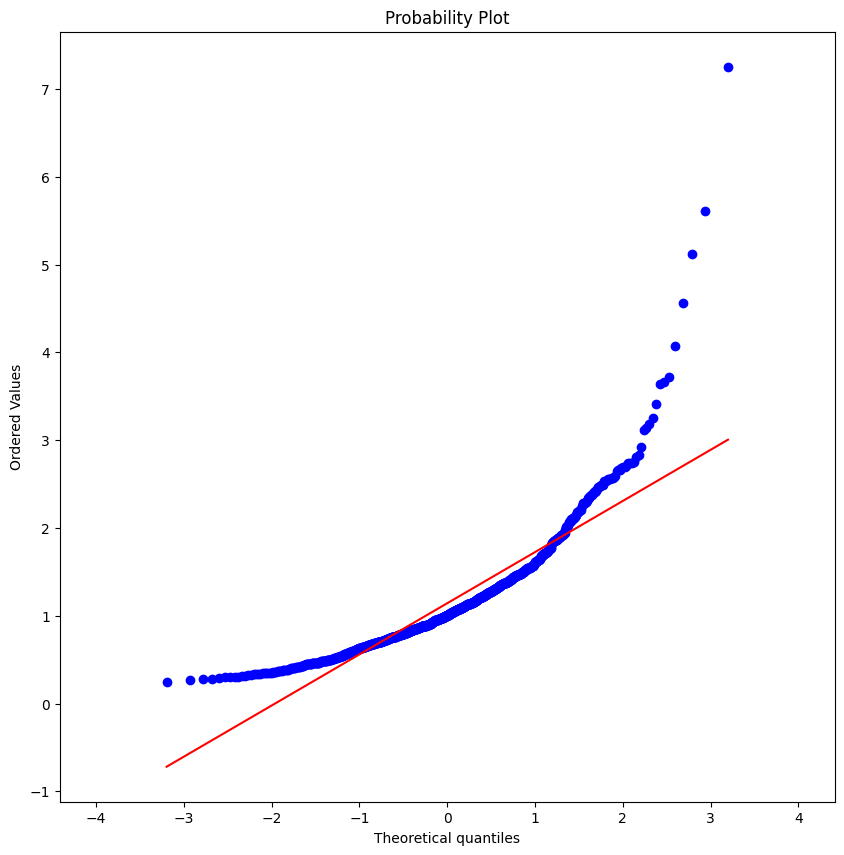

In [5]:
# Q-Q plot of non-normally-distributed sample
plt.figure(figsize=(10, 10)); plt.axis('equal')
stats.probplot(sample_b, dist='norm', plot=plt);

## Testing for Normality
### Shapiro-Wilk

The Shapiro-Wilk test is available in the scipy library.  The null hypothesis assumes that the data distribution is normal.  If the p-value is greater than the chosen p-value, we'll assume that it's normal. Otherwise we assume that it's not normal.
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html

In [12]:

def is_normal(sample, test=stats.shapiro, p_level=0.05, **kwargs):
    """Apply a normality test to check if sample is normally distributed."""
    t_stat, p_value = test(sample, **kwargs)

    print("Test statistic: {}, p-value: {}".format(t_stat, p_value))
    print("Is the distribution Likely Normal? {}".format(p_value > p_level))
    return p_value > p_level

# Using Shapiro-Wilk test (default)
print("Sample A:-"); is_normal(sample_a);
print("Sample B:-"); is_normal(sample_b);

Sample A:-
Test statistic: 0.997816801071167, p-value: 0.2141563445329666
Is the distribution Likely Normal? True
Sample B:-
Test statistic: 0.8954586386680603, p-value: 1.6481216065166933e-25
Is the distribution Likely Normal? False


## Kolmogorov-Smirnov

The Kolmogorov-Smirnov is available in the scipy.stats library.  The K-S test compares the data distribution with a theoretical distribution.  We'll choose the 'norm' (normal) distribution as the theoretical distribution, and we also need to specify the mean and standard deviation of this theoretical distribution.  We'll set the mean and standard deviation of the theoretical norm with the mean and standard deviation of the data distribution.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html

# Quiz

To use the Kolmogorov-Smirnov test, complete the function `is_normal_ks`.

To set the variable normal_args, create a tuple with two values.  An example of a tuple is `("apple","banana")`
The first is the mean of the sample. The second is the standard deviation of the sample.

**hint:** Hint: Numpy has functions np.mean() and np.std()

In [3]:
def is_normal_ks(sample, test=stats.kstest, p_level=0.05, **kwargs):
    """
    sample: a sample distribution
    test: a function that tests for normality
    p_level: if the test returns a p-value > than p_level, assume normality
    
    return: True if distribution is normal, False otherwise
    """
    normal_args = np.mean(sample), np.std(sample)
    print(normal_args)
    
    t_stat, p_value = test(sample, 'norm', normal_args, **kwargs)
    print("Test statistic: {}, p-value: {}".format(t_stat, p_value))
    print("Is the distribution Likely Normal? {}".format(p_value > p_level))
    return p_value > p_level

quiz_tests.test_is_normal_ks(is_normal_ks)

(-0.011039758679555511, 1.0493539397003677)
Test statistic: 0.011652420114929007, p-value: 0.999028381849217
Is the distribution Likely Normal? True
(1.1492784667535636, 0.5868671093608125)
Test statistic: 0.11142066256106986, p-value: 2.8705147771250983e-11
Is the distribution Likely Normal? False
Tests Passed


In [ ]:
# Using Kolmogorov-Smirnov test
print("Sample A:-"); is_normal_ks(sample_a);
print("Sample B:-"); is_normal_ks(sample_b);

If you're stuck, you can also check out the solution [here](test_normality_solution.ipynb)